In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import*
from fastai.vision import *
from fastai.utils.mem import *


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path=Path('drive/My Drive/asl-dataset')
path.ls()

[PosixPath('drive/My Drive/asl-dataset/asl_dataset'),
 PosixPath('drive/My Drive/asl-dataset/test_data')]

In [0]:
classes=['0','1','2','3','4','5','6','7','8','9']

In [0]:
tfms=get_transforms(max_zoom=1)

In [0]:
src=(ImageList.from_folder(path/'asl_dataset').split_by_rand_pct(0.2))

In [0]:
data=(src.label_from_folder()
.transform(tfms,padding_mode='zeros',size=256)
.databunch(bs=24)

.normalize(imagenet_stats))

In [0]:
data_test=(ImageList.from_folder(path/'test_data'))

In [0]:
data.add_test(data_test)

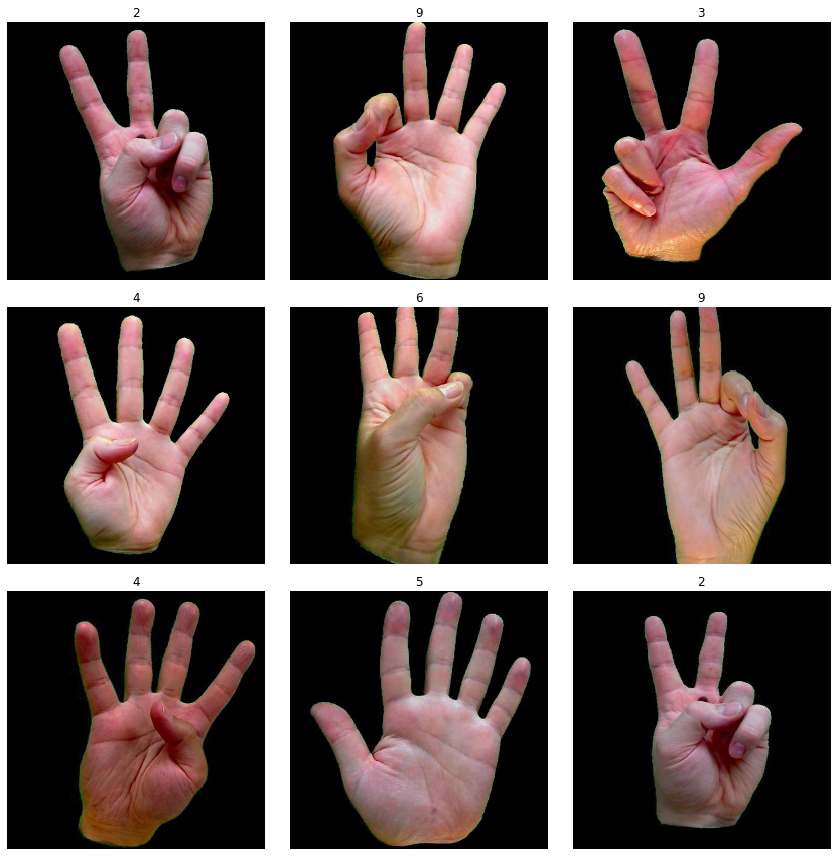

In [0]:
data.show_batch(rows=3)

In [0]:
learn=cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 47.7MB/s]


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


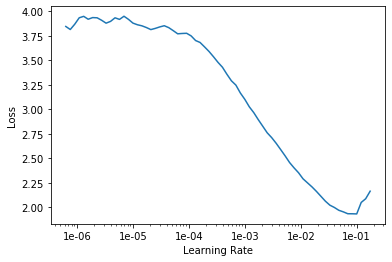

In [0]:
learn.recorder.plot(skip_end=10)

In [0]:
learn.fit_one_cycle(4,max_lr=1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,1.226147,1.385497,0.678571,00:32
1,0.865326,0.658561,0.800000,00:07
2,0.589931,0.282995,0.942857,00:07
3,0.403591,0.078912,0.971429,00:07


In [0]:
learn.save('stage1')

In [0]:
learn.load('stage1');

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


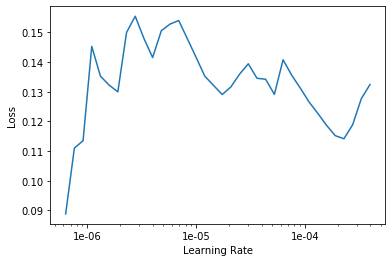

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(3,max_lr=slice(1e-05,1e-05*1.006))

epoch,train_loss,valid_loss,accuracy,time
0,0.114787,0.040236,0.985714,00:07
1,0.088445,0.024280,0.992857,00:07


KeyboardInterrupt: ignored

In [0]:
learn.save('stage2')

In [0]:
learn.load('stage2');

In [0]:
interpret=ClassificationInterpretation.from_learner(learn)

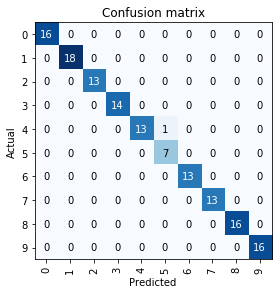

In [0]:
interpret.plot_confusion_matrix()

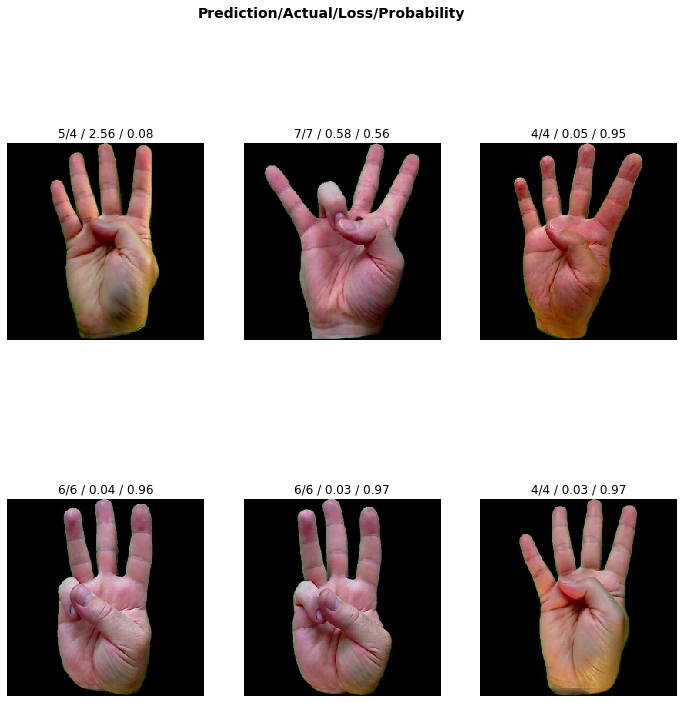

In [0]:
interpret.plot_top_losses(6)

In [0]:
preds=[]
acc=[]
for i in range(0,30):
  p=learn.predict(data.test_ds.x[i])
  preds.append(p[0])
  

In [0]:
preds

In [0]:
from google.colab import files
files.upload()

Saving asl9.jpg to asl9.jpg


{'asl9.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x00\x01\x00%\x00\x17\x00\x00\xff\xfe\x00\x1fLEAD Technologies Inc. V1.01\x00\xff\xdb\x00\x84\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\n\t\x08\n\r\x16\x0e\r\x0c\x0c\r\x1b\x13\x14\x10\x16 \x1c"!\x1f\x1c\x1f\x1e#(3+#&0&\x1e\x1f,=-0569:9"+?C>8C3897\x01\t\n\n\r\x0b\r\x1a\x0e\x0e\x1a7$\x1f$77777777777777777777777777777777777777777777777777\xff\xfe\x00\x1e\x02\x00\x00\x00\x02\x00\x00\x00\x04\x00\x00\x00Z\x00\x00\x00\x03\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\xff\xc4\x01\xa2\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x8

In [0]:
asl9=open_image('asl9.jpg')
#asl6=open_image('asl6.gif')

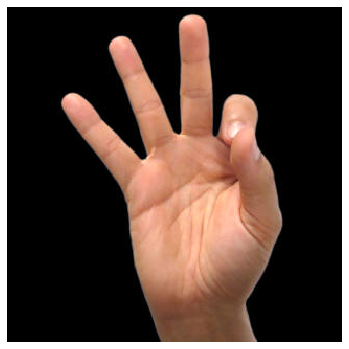

In [0]:
asl9.show(figsize=(6,7))

In [0]:
learn.predict(asl9)

(Category 9,
 tensor(9),
 tensor([2.5644e-10, 4.5874e-09, 1.8261e-10, 1.6805e-10, 8.9180e-05, 2.9324e-05,
         2.4321e-09, 4.5532e-09, 4.3777e-09, 9.9988e-01]))

In [0]:
learn.export('export.pkl')

In [0]:
defaults.device = torch.device('cpu')

In [0]:
path.ls()

[PosixPath('drive/My Drive/asl-dataset/asl_dataset'),
 PosixPath('drive/My Drive/asl-dataset/test_data')]

In [0]:
learn = load_learner(path/'asl_dataset')

In [0]:
#https://drive.google.com/uc?export=download&id=1-14Bq78fFdYaX2P2EtB2MOBbqGICM7VF

In [0]:
! pip list

Package                  Version    
------------------------ -----------
absl-py                  0.8.1      
alabaster                0.7.12     
albumentations           0.1.12     
altair                   4.0.0      
asgiref                  3.2.3      
astor                    0.8.1      
astropy                  3.0.5      
atari-py                 0.2.6      
atomicwrites             1.3.0      
attrs                    19.3.0     
audioread                2.1.8      
autograd                 1.3        
Babel                    2.7.0      
backcall                 0.1.0      
backports.tempfile       1.0        
backports.weakref        1.0.post1  
beautifulsoup4           4.6.3      
bleach                   3.1.0      
blis                     0.2.4      
bokeh                    1.0.4      
boto                     2.49.0     
boto3                    1.10.36    
botocore                 1.13.36    
Bottleneck               1.3.1      
branca                   0.3.1      
b